# Kenneth Woodard
# CS425
# Lab 2

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [164]:
# Question 1
# Read in CSV here
data = pd.read_csv("athletes.csv")

# Extract Males first
data = data.loc[data["sex"] == "male"]
# then bikers and basketballers
data = data.loc[(data["sport"] == "basketball") | (data["sport"] == "cycling")]

# isolate 3 columns: height, weight, and the sport
data = data[["height", "weight", "sport"]]

# drop any rows with NaN
data = data.dropna()

# convert height from m to cm
data['height'] = data['height']*100

print(data)

       height  weight       sport
4       181.0    71.0     cycling
40      172.0    66.0     cycling
91      172.0    58.0     cycling
95      194.0    90.0  basketball
135     165.0    68.0     cycling
...       ...     ...         ...
11435   180.0    89.0     cycling
11455   183.0    72.0     cycling
11460   203.0   105.0  basketball
11475   214.0   100.0  basketball
11476   172.0    65.0     cycling

[450 rows x 3 columns]


In [165]:
# Question 2
# split into classes
bike = data.loc[data["sport"] == "cycling"]
ball = data.loc[data["sport"] == "basketball"]

# find min, max, avg, std, and snr for each 
# and print table
print("TABLE")
print("Cycling  MAX   MIN   AVG   STD   SNR")
print("Height", end = "   ")
print(f'{np.max(bike["height"]):.1f}', end = " ")
print(f'{np.min(bike["height"]):.1f}', end = " ")
print(f'{np.average(bike["height"]):.1f}', end = " ")
print(f'{np.std(bike["height"]):.3f}', end = " ")
num = np.average(bike["height"]) / np.std(bike["height"])
print(f'{num:.1f}')
print("Weight", end = "   ")
print(f'{np.max(bike["weight"]):.1f}', end = " ")
print(f'{np.min(bike["weight"]):.2f}', end = " ")
print(f'{np.average(bike["weight"]):.2f}', end = " ")
print(f'{np.std(bike["weight"]):.3f}', end = " ")
num = np.average(bike["weight"]) / np.std(bike["weight"])
print(f'{num:.2f}')

print()
print("Hoops    MAX   MIN   AVG   STD   SNR")
print("Height", end = "   ")
print(f'{np.max(ball["height"]):.1f}', end = " ")
print(f'{np.min(ball["height"]):.1f}', end = " ")
print(f'{np.average(ball["height"]):.1f}', end = " ")
print(f'{np.std(ball["height"]):.3f}', end = " ")
num = np.average(ball["height"]) / np.std(ball["height"])
print(f'{num:.1f}')
print("Weight", end = "   ")
print(f'{np.max(ball["weight"]):.1f}', end = " ")
print(f'{np.min(ball["weight"]):.2f}', end = " ")
print(f'{np.average(ball["weight"]):.1f}', end = " ")
print(f'{np.std(ball["weight"]):.2f}', end = " ")
num = np.average(ball["weight"]) / np.std(ball["weight"])
print(f'{num:.2f}')

TABLE
Cycling  MAX   MIN   AVG   STD   SNR
Height   196.0 164.0 179.3 6.483 27.7
Weight   100.0 52.00 72.58 9.283 7.82

Hoops    MAX   MIN   AVG   STD   SNR
Height   218.0 181.0 200.4 8.330 24.1
Weight   137.0 79.00 100.3 11.92 8.41


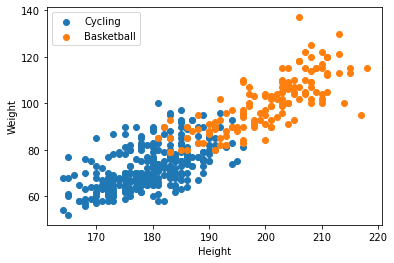

In [166]:
# Question 3
# plot the data for each sport
plt.scatter(bike["height"], bike["weight"], label = "Cycling")
plt.scatter(ball["height"], ball["weight"], label = "Basketball")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [167]:
# Question 4
# get training/test data and 
# apply 10 fold cross validation

X = np.c_[data["height"], data["weight"]]
y = np.array(data["sport"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
splits = KFold(n_splits=5)



In [168]:
# Question 5
# iterate over numbers 1-21, but odd numbers only
# print table with mean and standard deviation


print("N  mean      standard dev.")
for n in range(1,22,2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        neigh = KNeighborsClassifier(n_neighbors=n)
        X_subtrain = X_train[train_index]
        X_val = X_train[val_index]
        y_subtrain = y_train[train_index]
        y_val = y_train[val_index]
        neigh.fit(X_subtrain, y_subtrain)
        y_predict = neigh.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
        m = np.mean(scores)
        d = np.std(scores)
    if n < 10:
        print("0", end = "")
    print(n, f'{m:.7f}', f'{d:.7f}')

# hyperparameter 15 has the highest mean

N  mean      standard dev.
01 0.9000000 0.0204124
03 0.9000000 0.0103935
05 0.9111111 0.0188398
07 0.9194444 0.0204124
09 0.9166667 0.0232406
11 0.9194444 0.0238953
13 0.9194444 0.0238953
15 0.9277778 0.0238953
17 0.9222222 0.0207870
19 0.9250000 0.0188398
21 0.9222222 0.0257601


In [169]:
# Question 6

# build a KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# testing accuracy
y_predict = neigh.predict(X_test)
print("testing accuracy score  =", end = " ")
print(accuracy_score(y_test, y_predict))

# training accuracy
print("training accuracy score =", end = " ")
y_predict = neigh.predict(X_train)
print(accuracy_score(y_train, y_predict))

testing accuracy score  = 0.9555555555555556
training accuracy score = 0.9472222222222222


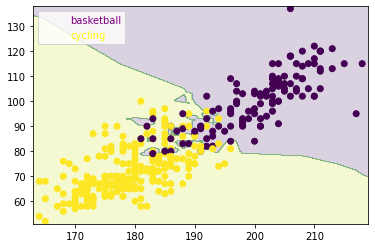

In [170]:
# Question 7

# Decision Boundaries
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1
y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1

# Meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
new_X = np.c_[xx.ravel(), yy.ravel()]

# Predict on new data
new_y = neigh.predict(new_X)

# convert strings to ints for plotting
# 0 = basketball, 1 = cycling
convert = []
for w in new_y:
    if w == "basketball":
        convert.append(0)
    else:
        convert.append(1)
        
# convert from list to np array        
con = np.array(convert)

# Plot contour map
zz = con.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.2)

# set up array of colors for scatter plot
colors = []
for w in y_train:
    if w == "basketball":
        colors.append(0)
    else:
        colors.append(1)            

# Scatter plot
plt.scatter(X_train[:,0], X_train[:,1], c = colors)
plt.legend(["basketball", "cycling"], labelcolor = ['purple', 'yellow'], loc="upper left")
plt.show()